In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import math
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_csv('../DATA/banking.csv', header=0)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [3]:
age_class = []
for x in data.age:
    if x < 25:
        age_class.append('17-25')
    elif 25 <= x < 35:
        age_class.append('26-35')
    elif 35 <= x < 45:
        age_class.append('36-45')
    elif 45 <= x < 55:
        age_class.append('46-55')
    else:
        age_class.append('56+')

In [4]:
data['age_group'] = age_class

In [5]:
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_group
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,36-45


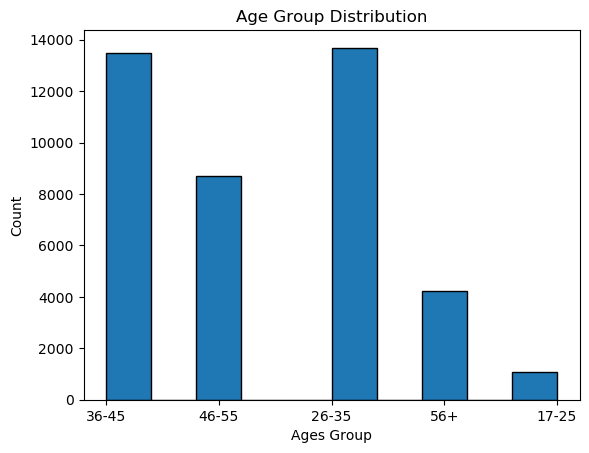

In [6]:
plt.hist(data['age_group'], bins=10, edgecolor='black')
plt.xlabel('Ages Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

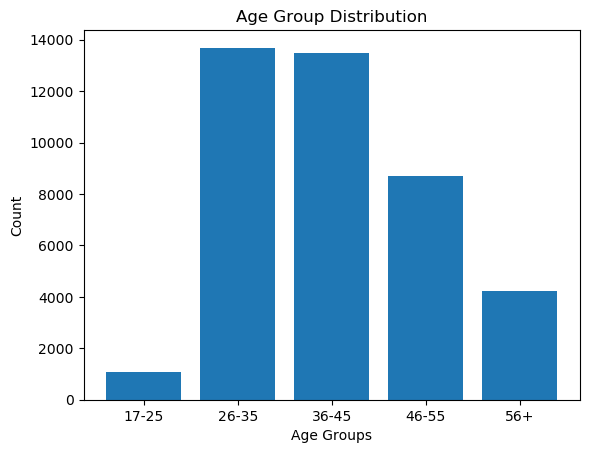

In [7]:
# Data for age groups and their corresponding counts
age_ranges = ['17-25', '26-35', '36-45', '46-55', '56+']
counts = [1068, 13686, 13500, 8704, 4230]

# Create a bar chart
plt.bar(age_ranges, counts)

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Group Distribution')

# Show the plot
plt.show()

In [8]:
data['age_group'].describe()

count     41188
unique        5
top       26-35
freq      13686
Name: age_group, dtype: object

In [9]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [10]:
grouped_counts = data.groupby(['age_group', 'y']).size()

In [11]:
data['age_group'].value_counts()

26-35    13686
36-45    13500
46-55     8704
56+       4230
17-25     1068
Name: age_group, dtype: int64

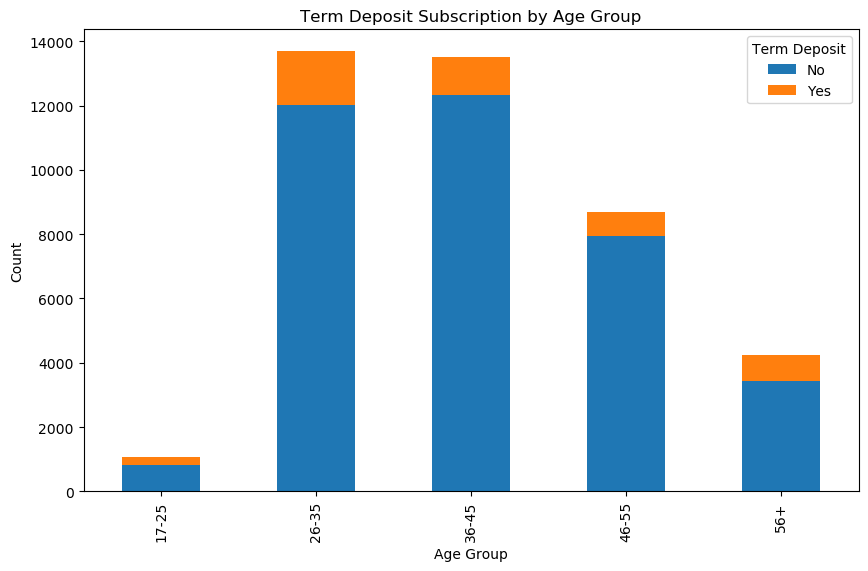

In [12]:
# Group the data by 'age_group' and 'y' to count the occurrences
grouped_data = data.groupby(['age_group', 'y']).size().unstack()

# Plot the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Term Deposit Subscription by Age Group')

# Show the legend
ax.legend(title='Term Deposit', labels=['No', 'Yes'])

# Display the plot
plt.show()

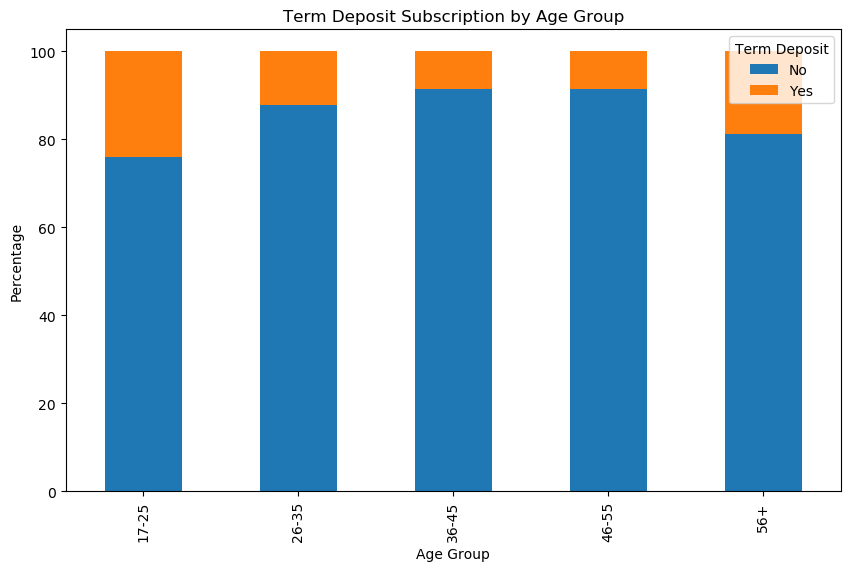

In [13]:
# Group the data by 'age_group' and 'y' to count the occurrences
grouped_data = data.groupby(['age_group', 'y']).size().unstack()

# Calculate the percentage for each age group
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.set_title('Term Deposit Subscription by Age Group')

# Show the legend
ax.legend(title='Term Deposit', labels=['No', 'Yes'])

# Display the plot
plt.show()

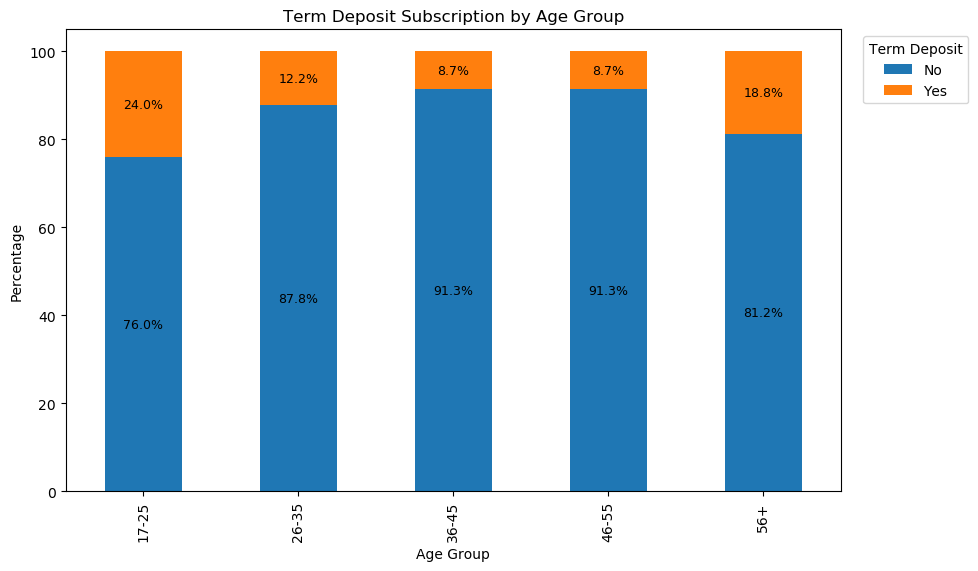

In [14]:
# Group the data by 'age_group' and 'y' to count the occurrences
grouped_data = data.groupby(['age_group', 'y']).size().unstack()

# Calculate the percentage for each age group
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage')
ax.set_title('Term Deposit Subscription by Age Group')

# Show the legend
ax.legend(title='Term Deposit', labels=['No', 'Yes'])

# Add percentage labels on the bars
for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=9)

ax.legend(title='Term Deposit', labels=['No', 'Yes'], bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

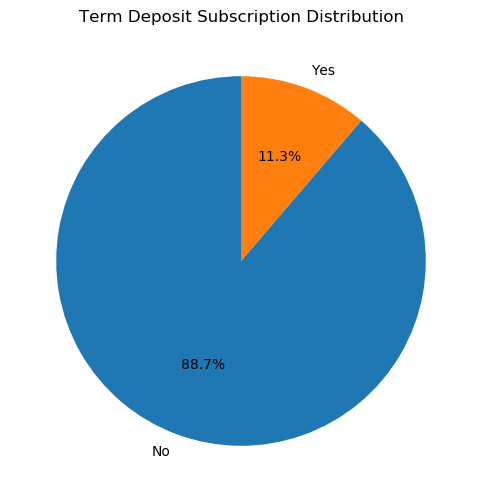

In [15]:
# Calculate the counts for each category
counts = data['y'].value_counts()

# Calculate the percentage for each category
percentages = counts / counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Term Deposit Subscription Distribution')

# Display the pie chart
plt.show()

In [16]:
age_class = []
for v in data.age:
    if v > 50:
        age_class.append('above 50')
    else:
        age_class.append('below 50')

In [17]:
data['age_class'] = age_class

In [18]:
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_group,age_class
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,36-45,below 50


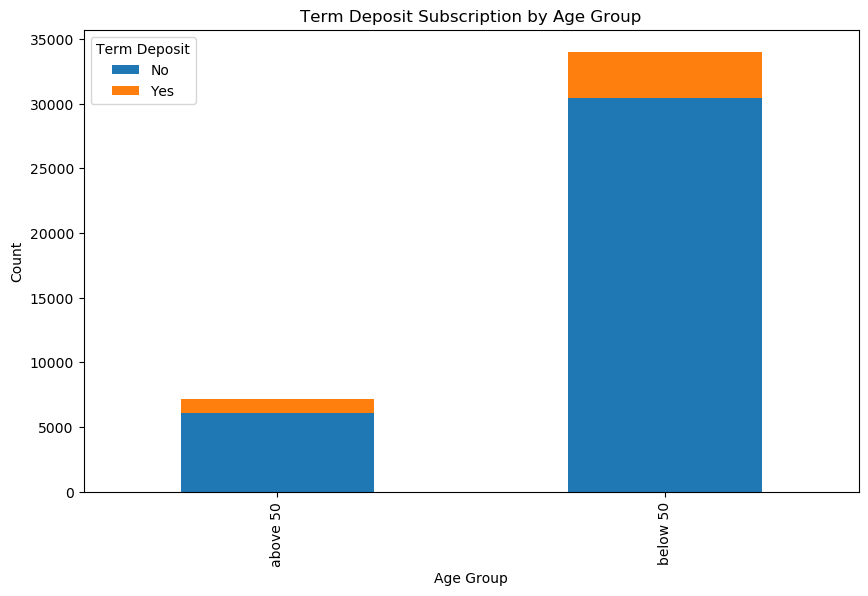

In [19]:
# Group the data by 'age_group' and 'y' to count the occurrences
grouped_data = data.groupby(['age_class', 'y']).size().unstack()

# Plot the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Term Deposit Subscription by Age Group')

# Show the legend
ax.legend(title='Term Deposit', labels=['No', 'Yes'])

# Display the plot
plt.show()

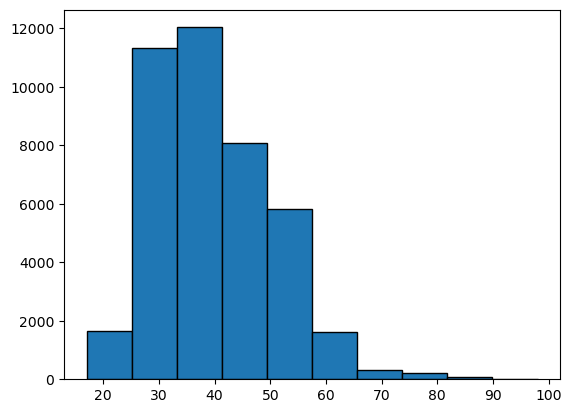

In [20]:
plt.hist(data['age'], bins=10, edgecolor='black')
plt.show()

In [21]:
data['age'].min()

17

In [22]:
data['age'].max()

98

In [23]:
data['age'].mean()

40.02406040594348

In [24]:
data['age'].mode()

0    31
dtype: int64

In [25]:
data['age'].median()

38.0

In [26]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

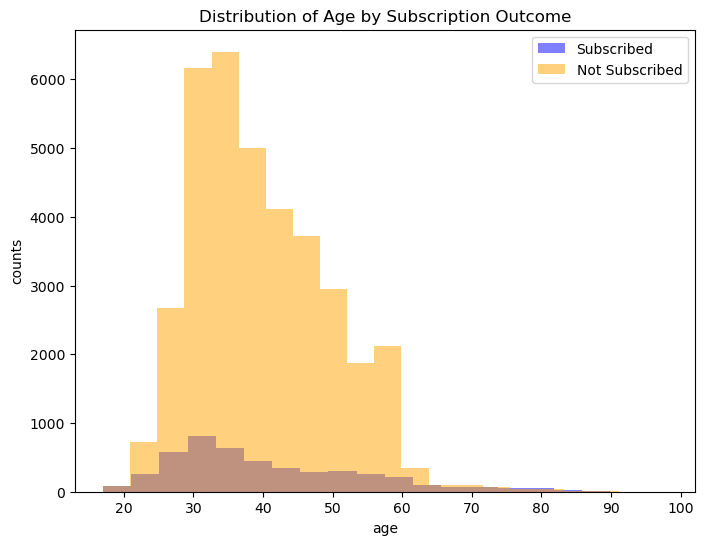

In [27]:
# Select the numerical variables and the subscription outcome variable
numerical_vars = ['age']
subscription_outcome = 'y'
# Define colors for subscribers and non-subscribers
subscribed_color = 'blue'
not_subscribed_color = 'orange'
# Create histograms for each numerical variable separately for subscribers and non-subscribers
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    
    # Histogram for subscribers
    plt.hist(data[data[subscription_outcome] == 1][var], bins=20, alpha=0.5, label='Subscribed', color=subscribed_color)
    
    # Histogram for non-subscribers
    plt.hist(data[data[subscription_outcome] == 0][var], bins=20, alpha=0.5, label='Not Subscribed', color=not_subscribed_color)
    
    plt.title(f'Distribution of Age by Subscription Outcome')
    plt.xlabel(var)
    plt.ylabel('counts')
    plt.legend()

In [28]:
age_subscription_counts = data.groupby(['age', 'y']).size().unstack()

# Display value counts
print(age_subscription_counts)

y       0     1
age            
17    3.0   2.0
18   16.0  12.0
19   22.0  20.0
20   42.0  23.0
21   73.0  29.0
..    ...   ...
91    2.0   NaN
92    1.0   3.0
94    1.0   NaN
95    1.0   NaN
98    NaN   2.0

[78 rows x 2 columns]


In [29]:
age_subscription_counts.head(78)

y,0,1
age,,
17,3.0,2.0
18,16.0,12.0
19,22.0,20.0
20,42.0,23.0
21,73.0,29.0
...,...,...
91,2.0,NaN
92,1.0,3.0
94,1.0,NaN


In [30]:
age_subscription_counts = age_subscription_counts.fillna(0)

In [31]:
age_subscription_counts.head(40)

y,0,1
age,,
17,3.0,2.0
18,16.0,12.0
19,22.0,20.0
20,42.0,23.0
21,73.0,29.0
22,101.0,36.0
23,178.0,48.0
24,377.0,86.0
25,505.0,93.0


In [32]:
age_subscription_counts.tail(38)

y,0,1
age,,
57,584.0,62.0
58,518.0,58.0
59,394.0,69.0
60,225.0,58.0
61,41.0,32.0
62,37.0,25.0
63,38.0,17.0
64,30.0,27.0
65,21.0,23.0


In [33]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Relationship between Features and Subscription

In [35]:
def bar_charts(data, feature):
    '''
    Inputs:
    data: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'age': 'count'
    }
    _groupby = ['y', feature]

    data_feature = data.groupby(by=_groupby).agg(_agg)
    
    ax = data_feature['age'].unstack().plot(kind='bar', figsize=(15, 6))
    plt.legend(list(data_feature.index.levels[1].unique()))
    plt.xlabel('Subscription to a term deposit')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.ylabel('Counts')  # Set the y-axis label
    plt.show()

In [36]:
data['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [37]:
def create_age(x):
    if x > 50:
        age_class = 1
    else:
        age_class = 2
    return age_class

In [38]:
data['age_class'] = data['age'].apply(create_age)

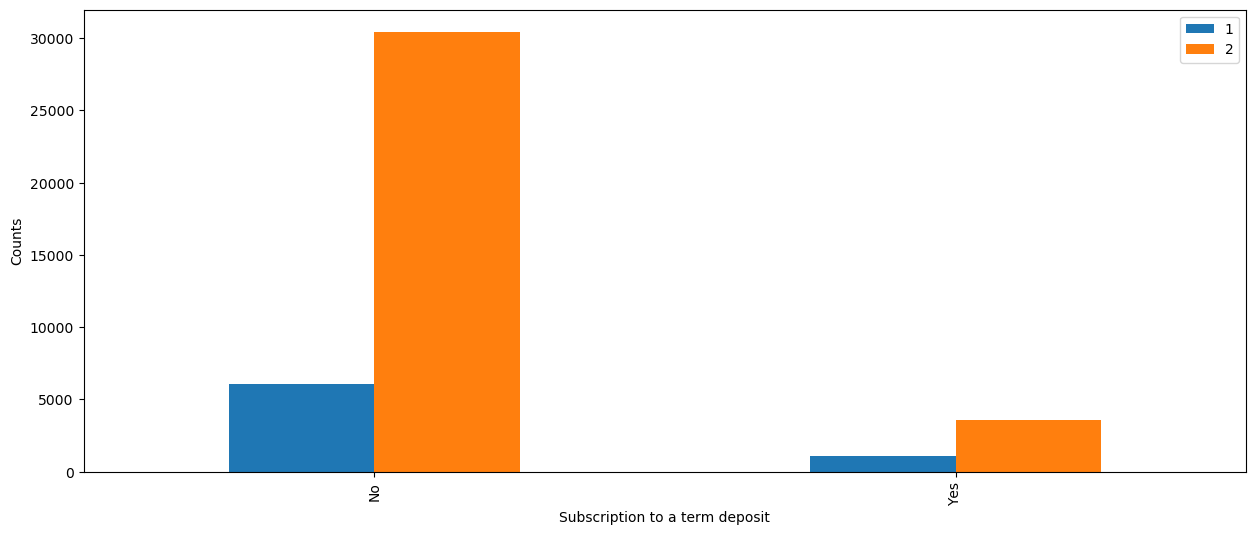

In [39]:
bar_charts(data, 'age_class')

In [40]:
data_young = data[data['age'] <= 35].sample(1000, random_state=42)
data_old = data[data['age'] > 35].sample(1000, random_state=42)

In [41]:
data_young['y'].value_counts()

0    870
1    130
Name: y, dtype: int64

In [42]:
data_old['y'].value_counts()

0    894
1    106
Name: y, dtype: int64

In [43]:
N = 1000
a = data_young['y']
b = data_old['y']

In [44]:
alpha = 0.05

In [45]:
a = data_young['y']
b = data_old['y']

In [46]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [47]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

In [48]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [49]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 1.6638123578622872
p = 0.0963067502327446


In [50]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [51]:
print_sig(p, alpha)

We reject our null hypothesis.


In [52]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 1.6638123578622892
p = 0.09630675023274432
We fail to reject our null hypothesis.


In [53]:
#Null Hypothesis (H0): There is no difference in the subscription to a term deposit when it comes to age of the client

#Alternative Hypothesis (HA): There is a difference in the subscription to a term deposit when it comes to age of the client

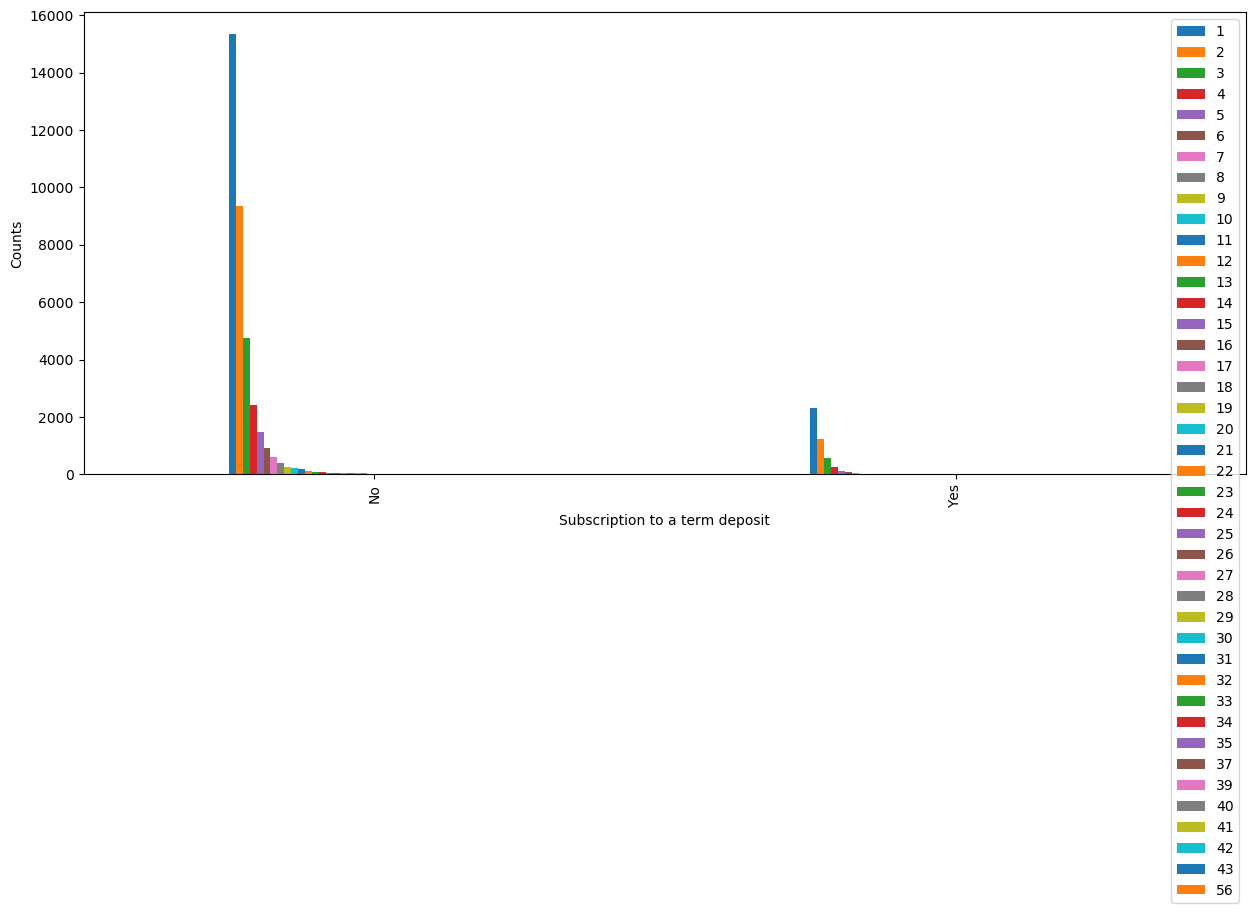

In [54]:
bar_charts(data, 'campaign')

In [55]:
def create_campaign(x):
    if x > 20:
        campaign_class = 1
    elif x > 10 and x <= 20:
        campaign_class = 2
    elif x > 5 and x <= 10:
        campaign_class = 3
    else:
        campaign_class = 4
    return campaign_class

In [56]:
data['campaign_class'] = data['campaign'].apply(create_campaign)

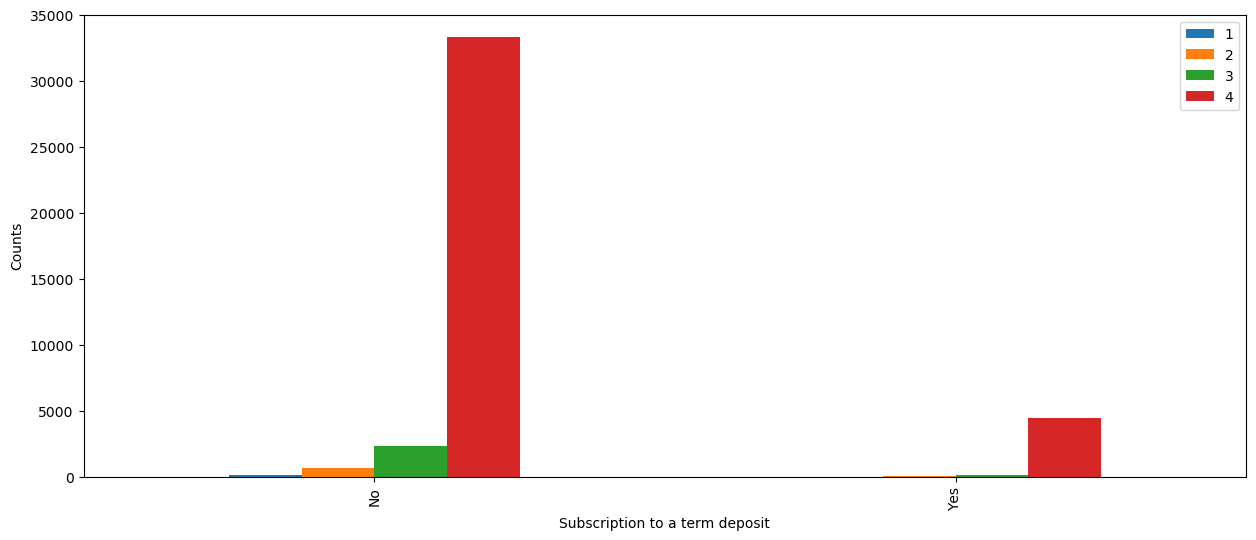

In [57]:
bar_charts(data, 'campaign_class')

In [58]:
def bar_charts(data, feature):
    '''
    Inputs:
    data: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'contact': 'count'
    }
    _groupby = ['y', feature]

    data_feature = data.groupby(by=_groupby).agg(_agg)
    
    ax = data_feature['contact'].unstack().plot(kind='bar', figsize=(15, 6))
    plt.legend(list(data_feature.index.levels[1].unique()))
    plt.xlabel('Subscription to a term deposit')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.ylabel('Counts')  # Set the y-axis label
    plt.show()

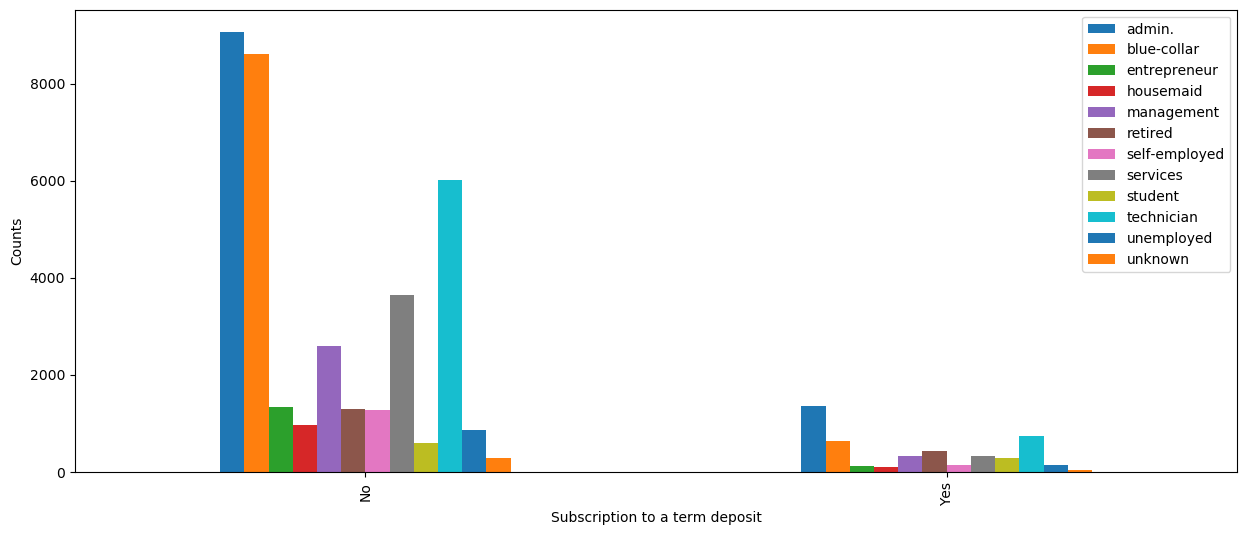

In [59]:
bar_charts(data, 'job')

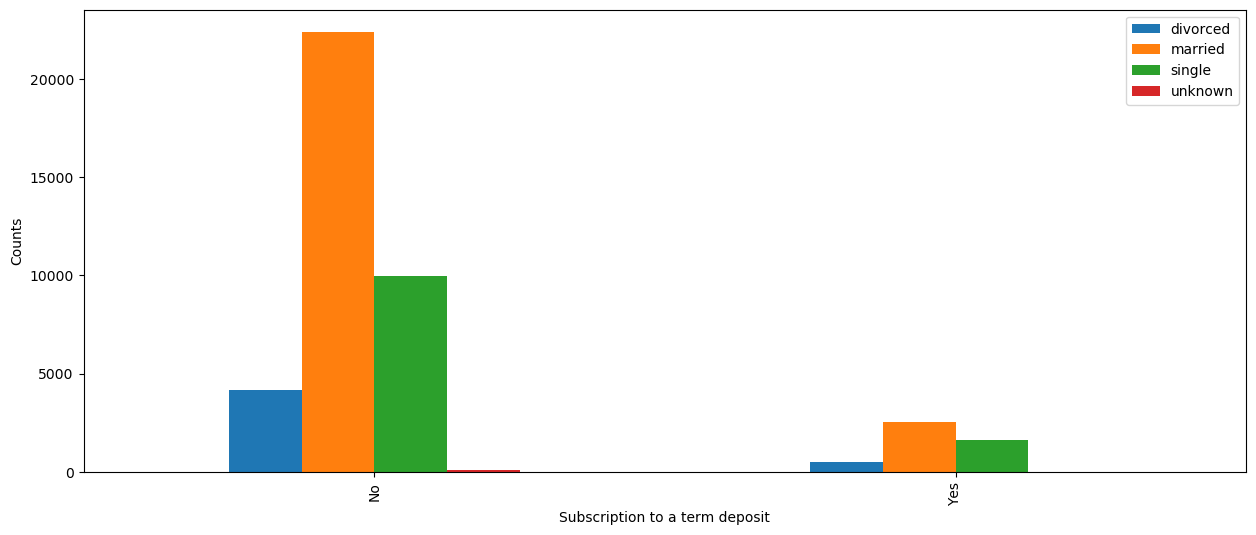

In [60]:
bar_charts(data, 'marital')

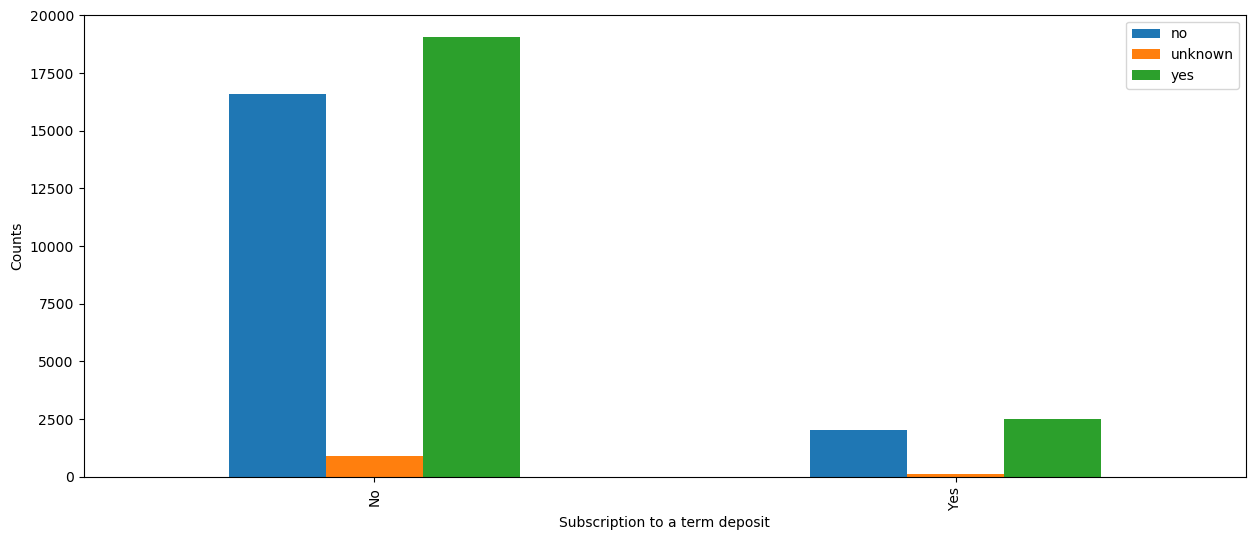

In [61]:
bar_charts(data, 'housing')

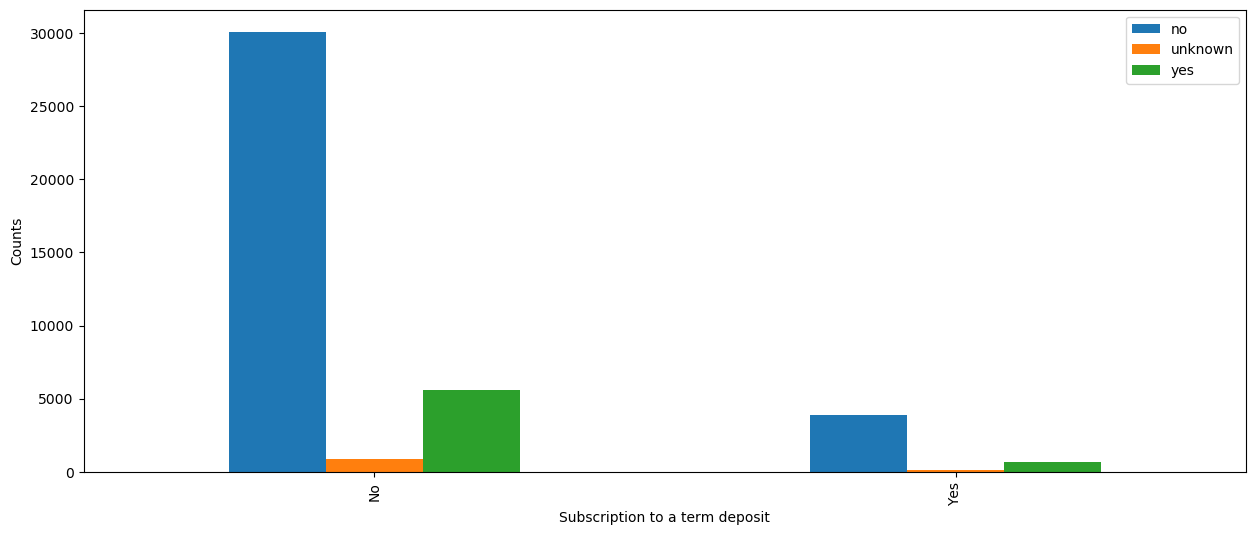

In [62]:
bar_charts(data, 'loan')

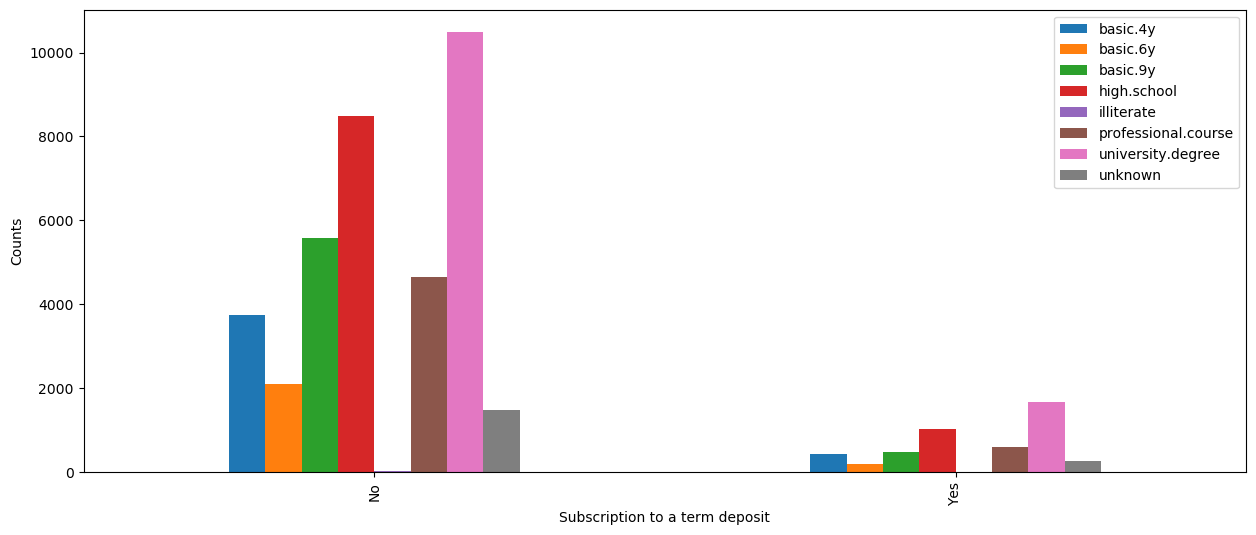

In [63]:
bar_charts(data, 'education')

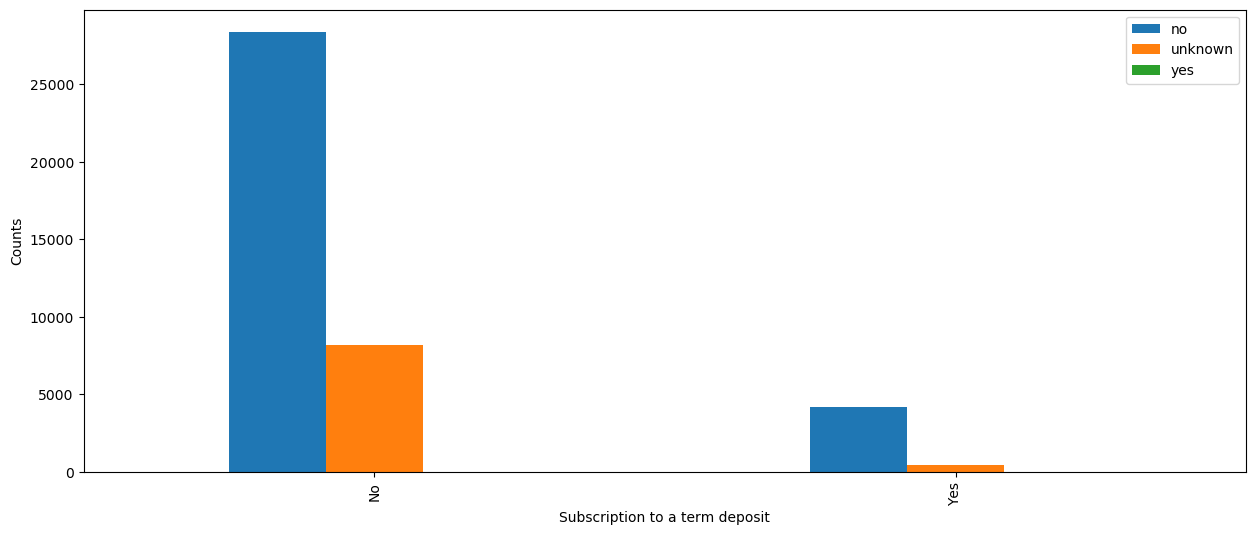

In [64]:
bar_charts(data, 'default')

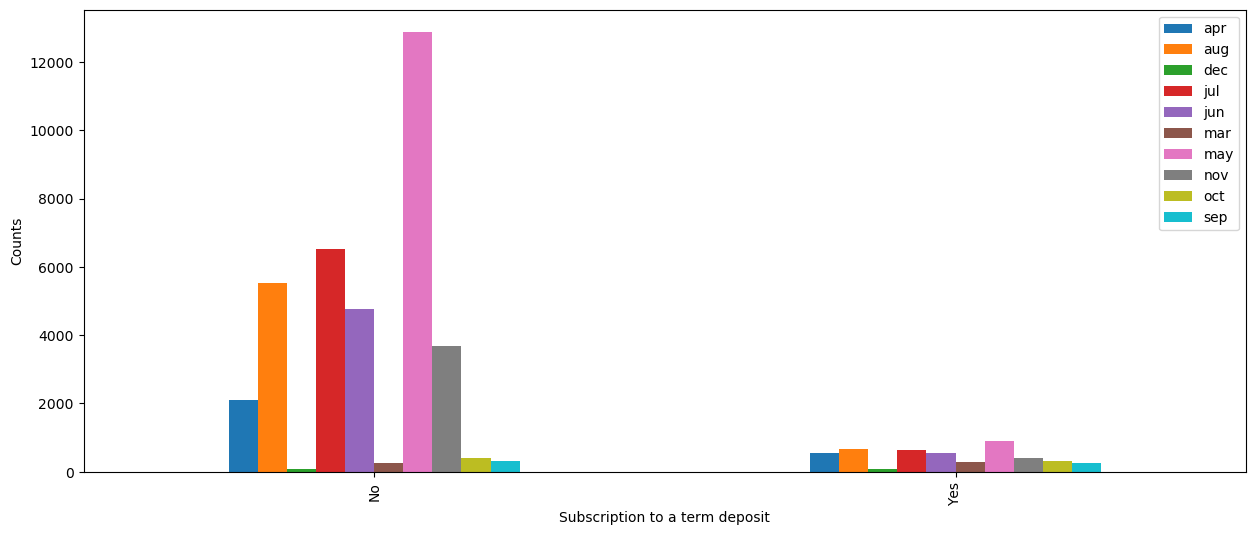

In [65]:
bar_charts(data, 'month')

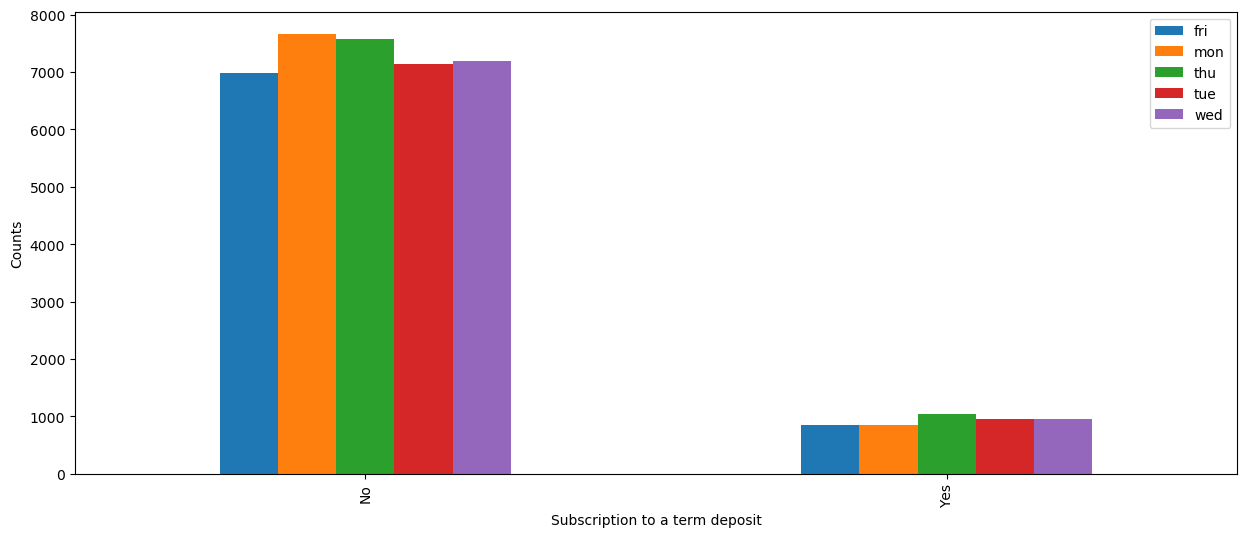

In [66]:
bar_charts(data, 'day_of_week')

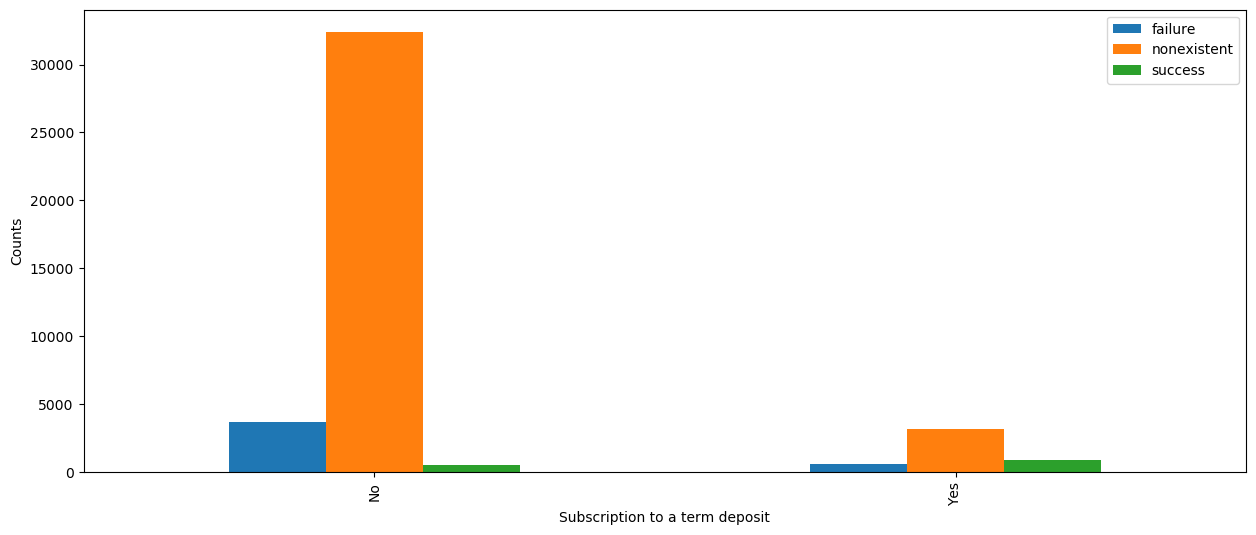

In [67]:
bar_charts(data, 'poutcome')

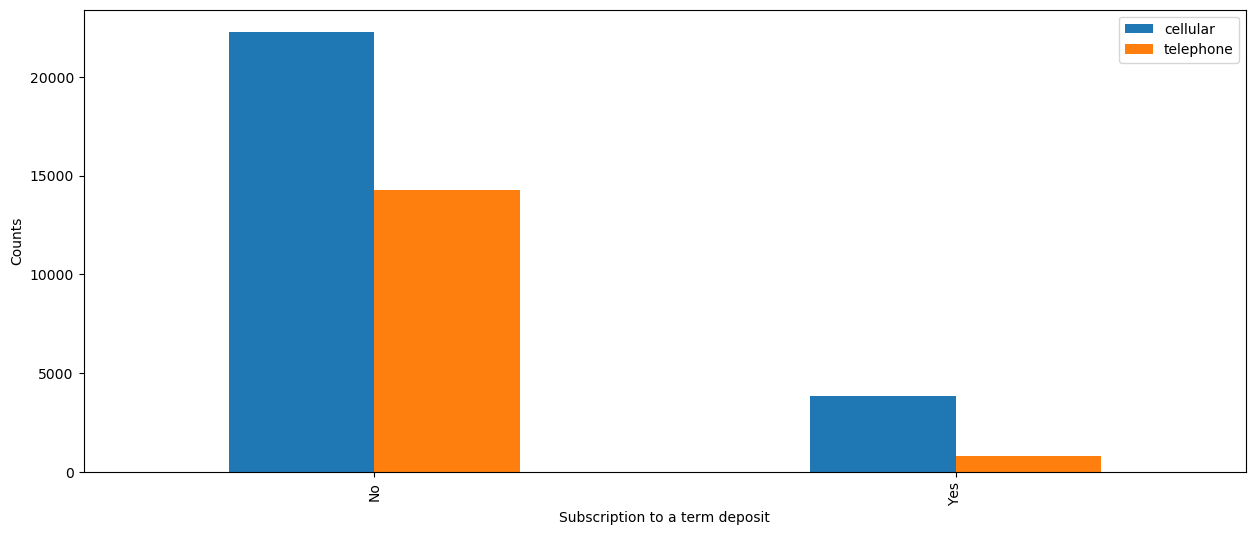

In [68]:
bar_charts(data, 'contact')

In [69]:
contingency_table = pd.crosstab(data['contact'], data['y'])

In [70]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [71]:
alpha = 0.05  # significance level

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in subscription based on contact method.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in subscription based on contact method.")

Chi-square statistic: 862.3183642075705
P-value: 1.5259856523129964e-189
Reject the null hypothesis. There is a significant difference in subscription based on contact method.


In [72]:
#1.5259856523129964 x 10^(-189)

In [73]:
contingency_table = pd.crosstab(data['job'], data['y'])

In [74]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [75]:
alpha = 0.05  # significance level

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in subscription based on job types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in subscription based on job types.")

Chi-square statistic: 961.2424403289555
P-value: 4.189763287563623e-199
Reject the null hypothesis. There is a significant difference in subscription based on job types.


In [76]:
contingency_table = pd.crosstab(data['housing'], data['y'])

In [77]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [78]:
alpha = 0.05  # significance level

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in subscription based on housing loans")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in subscription based on housing loans")

Chi-square statistic: 5.684495858974168
P-value: 0.05829447669453452
Fail to reject the null hypothesis. There is no significant difference in subscription based on housing loans


In [79]:
contingency_table = pd.crosstab(data['age_group'], data['y'])

In [80]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [81]:
alpha = 0.05  # significance level

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in subscription based on age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in subscription based on age groups.")

Chi-square statistic: 578.3653175689354
P-value: 7.451410396012846e-124
Reject the null hypothesis. There is a significant difference in subscription based on age groups.


In [82]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Define the data in a pandas DataFrame
data = {
    "Age Group": ["17-25", "26-35", "36-45", "46-55", "56+"],
    "Not Subscribed (y=0)": [812, 12020, 12332, 7951, 3433],
    "Subscribed (y=1)": [256, 1666, 1168, 753, 797]
}
df = pd.DataFrame(data)

# Create the contingency table from the DataFrame
contingency_table = df.set_index("Age Group").values

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

# Determine whether to reject the null hypothesis or not
alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant association between age group and term deposit subscription.")
else:
    print("Fail to reject the null hypothesis. There is no significant association.")

Chi-square statistic: 578.3653175689354
P-value: 7.451410396012846e-124
Reject the null hypothesis. There is a significant association between age group and term deposit subscription.
